In [57]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os, shutil

In [15]:
loop_data = pd.read_csv('../data/SegALDF.csv')
print(loop_data.shape)
loop_data.head()

(135245, 3)


,Filename,AvgLeastConfidence,AvgMargin
0,/data/NOAA_ERI/Delta/20201010a_jpgs/jpgs/S2846...,0.395983,0.388635
1,/data/NOAA_ERI/Delta/20201010a_jpgs/jpgs/P2846...,0.323083,0.503063
2,/data/NOAA_ERI/Delta/20201010a_jpgs/jpgs/S2846...,0.409629,0.384073
3,/data/NOAA_ERI/Delta/20201010a_jpgs/jpgs/P2846...,0.386606,0.396383
4,/data/NOAA_ERI/Delta/20201010a_jpgs/jpgs/S2846...,0.269144,0.588699


In [16]:
lambda_data = pd.read_csv('../data/LambdaSegALDF.csv')
print(lambda_data.shape)
lambda_data.head()

(135245, 2)


,Filename,MeanConfidence
0,Barry/20190716a_jpgs/jpgs/C19748935.jpg,0.312211
1,Barry/20190716a_jpgs/jpgs/C19748941.jpg,0.328417
2,Barry/20190716a_jpgs/jpgs/C19748947.jpg,0.360161
3,Barry/20190716a_jpgs/jpgs/C19748953.jpg,0.357218
4,Barry/20190716a_jpgs/jpgs/C19748959.jpg,0.375271


In [17]:
#remove some parts of the filename foor loop_data
loop_data['Filename'] = loop_data['Filename'].str.replace('/data/NOAA_ERI/', '', regex=True)
loop_data.head()

,Filename,AvgLeastConfidence,AvgMargin
0,Delta/20201010a_jpgs/jpgs/S28460605.jpg,0.395983,0.388635
1,Delta/20201010a_jpgs/jpgs/P28462750.jpg,0.323083,0.503063
2,Delta/20201010a_jpgs/jpgs/S28462059.jpg,0.409629,0.384073
3,Delta/20201010a_jpgs/jpgs/P28462018.jpg,0.386606,0.396383
4,Delta/20201010a_jpgs/jpgs/S28462952.jpg,0.269144,0.588699


In [18]:
# rename column for MeanConf in Lambda

lambda_data.rename(columns = {'MeanConfidence':'L_MeanConfidence'}, inplace = True)
lambda_data.head()

,Filename,L_MeanConfidence
0,Barry/20190716a_jpgs/jpgs/C19748935.jpg,0.312211
1,Barry/20190716a_jpgs/jpgs/C19748941.jpg,0.328417
2,Barry/20190716a_jpgs/jpgs/C19748947.jpg,0.360161
3,Barry/20190716a_jpgs/jpgs/C19748953.jpg,0.357218
4,Barry/20190716a_jpgs/jpgs/C19748959.jpg,0.375271


In [19]:
#join dataframes
Both = loop_data.merge(lambda_data, left_on = ['Filename'], right_on = ['Filename'])
print(Both.shape)
Both.head()

(135245, 4)


,Filename,AvgLeastConfidence,AvgMargin,L_MeanConfidence
0,Delta/20201010a_jpgs/jpgs/S28460605.jpg,0.395983,0.388635,0.395983
1,Delta/20201010a_jpgs/jpgs/P28462750.jpg,0.323083,0.503063,0.323083
2,Delta/20201010a_jpgs/jpgs/S28462059.jpg,0.409629,0.384073,0.409629
3,Delta/20201010a_jpgs/jpgs/P28462018.jpg,0.386606,0.396383,0.386606
4,Delta/20201010a_jpgs/jpgs/S28462952.jpg,0.269144,0.588699,0.269144


In [34]:
#Confidence is the difference between 1 and teh best prediction at each pixel
#smaller values indictate the pixel predction had high probability form teh model  model was certain
#higher values indicate the model was less certain about the prediction
#so we are looking for the maximum of the Least Confidence column(s)

Both.sort_values(by=['AvgLeastConfidence'],ascending=False)

,Filename,AvgLeastConfidence,AvgMargin,L_MeanConfidence
105632,Barry/20190716a_jpgs/jpgs/S19757315.jpg,0.593094,0.142753,0.593094
90820,Zeta/20201029a_jpgs/jpgs/P30358866.jpg,0.587170,0.146159,0.587170
90143,Zeta/20201029a_jpgs/jpgs/P30358870.jpg,0.583952,0.149980,0.583953
68829,Florence/20180919c_jpgs/jpgs/C26260661.jpg,0.582784,0.147615,0.582783
85063,Zeta/20201029b_jpgs/jpgs/P30359474.jpg,0.580134,0.155632,0.580134
...,...,...,...,...
24111,Dorian/20190919a_jpgs/jpgs/S26252837.jpg,0.015534,0.976339,0.015534
24895,Dorian/20190919a_jpgs/jpgs/S26252852.jpg,0.015504,0.976411,0.015504
91978,Isaias/20200803a_jpgs/jpgs/P21666551.jpg,0.015482,0.976902,0.015482
24011,Dorian/20190919a_jpgs/jpgs/S26253938.jpg,0.015469,0.976517,0.015469


In [45]:
#Both.sort_values(by=['AvgLeastConfidence'],ascending=False).index[0]

In [24]:
#the worst pred will have the smallest Margin
Both.sort_values(by=['AvgMargin'])

,Filename,AvgLeastConfidence,AvgMargin,L_MeanConfidence
105632,Barry/20190716a_jpgs/jpgs/S19757315.jpg,0.593094,0.142753,0.593094
90820,Zeta/20201029a_jpgs/jpgs/P30358866.jpg,0.587170,0.146159,0.587170
68829,Florence/20180919c_jpgs/jpgs/C26260661.jpg,0.582784,0.147615,0.582783
90143,Zeta/20201029a_jpgs/jpgs/P30358870.jpg,0.583952,0.149980,0.583953
120742,Laura/20200828a_jpgs/jpgs/S24156284.jpg,0.577079,0.153189,0.577079
...,...,...,...,...
24011,Dorian/20190919a_jpgs/jpgs/S26253938.jpg,0.015469,0.976517,0.015469
92440,Isaias/20200803a_jpgs/jpgs/P21666867.jpg,0.015826,0.976520,0.015826
94288,Isaias/20200803a_jpgs/jpgs/P21666873.jpg,0.015772,0.976543,0.015772
25531,Dorian/20190919a_jpgs/jpgs/S26252834.jpg,0.015219,0.976764,0.015219


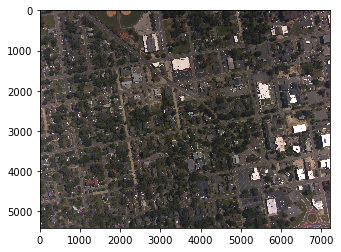

In [50]:
#Lets look at a few, this is one :
gen_path = '/data/NOAA_ERI/'
im_path = 'Florence/20180919c_jpgs/jpgs/C26260661.jpg'

full_path = gen_path + im_path

img = matplotlib.image.imread(full_path)
imgplot = plt.imshow(img)

In [ ]:
#run through the model to look at softmax scores.

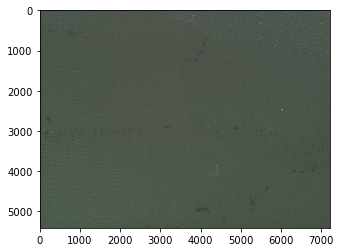

In [51]:
#Lets look at a few:
gen_path = '/data/NOAA_ERI/'
im_path = 'Laura/20200828a_jpgs/jpgs/S24156284.jpg'

full_path = gen_path + im_path

img = matplotlib.image.imread(full_path)
imgplot = plt.imshow(img)

In [64]:
#move 100 images to a folder

#find the 100 largest least cetrtainty
Largest = Both.nlargest(200, 'AvgLeastConfidence')
Largest.head()

,Filename,AvgLeastConfidence,AvgMargin,L_MeanConfidence
105632,Barry/20190716a_jpgs/jpgs/S19757315.jpg,0.593094,0.142753,0.593094
90820,Zeta/20201029a_jpgs/jpgs/P30358866.jpg,0.587170,0.146159,0.587170
90143,Zeta/20201029a_jpgs/jpgs/P30358870.jpg,0.583952,0.149980,0.583953
68829,Florence/20180919c_jpgs/jpgs/C26260661.jpg,0.582784,0.147615,0.582783
85063,Zeta/20201029b_jpgs/jpgs/P30359474.jpg,0.580134,0.155632,0.580134


In [65]:
###### MOVE THE IMAGES THAT ARE UNCERTAIN

#make a new dir
newdir = '../data/toLabelRound1'
os.mkdir(newdir)

Largest['Image_Path'] = '/data/NOAA_ERI/' + Largest['Filename'].astype(str)

#pull out the list from the df
MoveList= Largest['Image_Path'].tolist()

#move those on the list
for f in MoveList:
    shutil.copy(f, newdir)